<a href="https://colab.research.google.com/github/pratik6217/Python-Notebooks/blob/main/Covid_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use("fivethirtyeight")
%matplotlib inline

In [273]:
#Loading the datset

df = pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv", parse_dates=["Date"])
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [145]:
df["Total Cases"] = df["Confirmed"] + df["Recovered"] + df["Deaths"]
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0


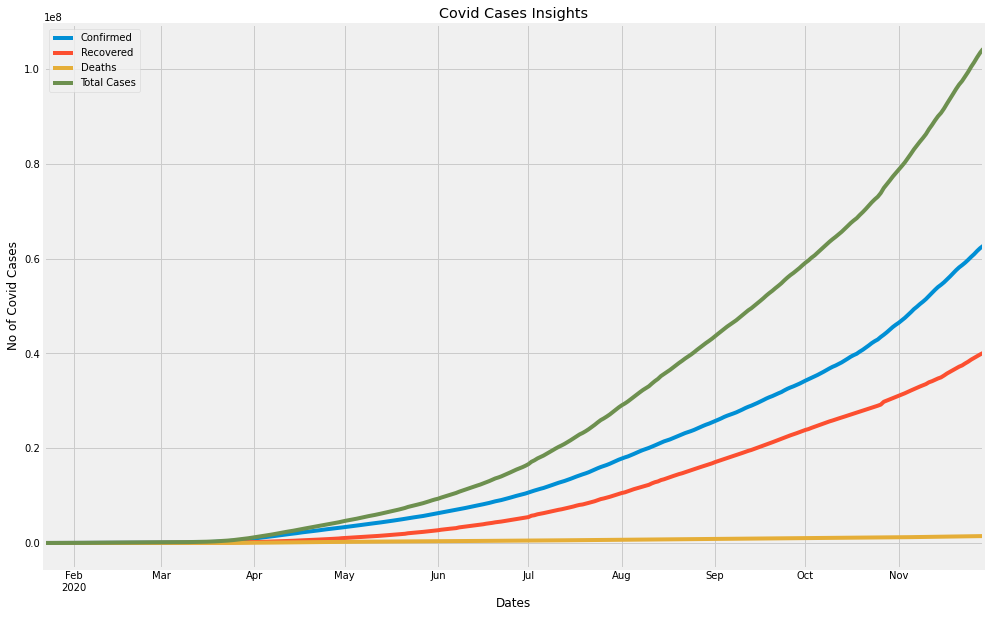

In [146]:
#WorldWide Cases
world_wide_df["Total Cases"] = df[["Confirmed", "Recovered", "Deaths"]].sum(axis=1)
world_wide_df = df.groupby(["Date"]).sum()
w = world_wide_df.plot(figsize=(15,10))
w.set_xlabel("Dates")
w.set_ylabel("No of Covid Cases")
w.title.set_text("Covid Cases Insights")
plt.show()

             Confirmed  Recovered  Deaths  Total Cases
Country                                               
Afghanistan    6917643    4753697  232609     11903949
Albania        2148853    1161796   55708      3366357
Algeria        7616006    5186403  294143     13096552
Andorra         445962     337692   12938       796592
Angola          820253     354571   24784      1199608


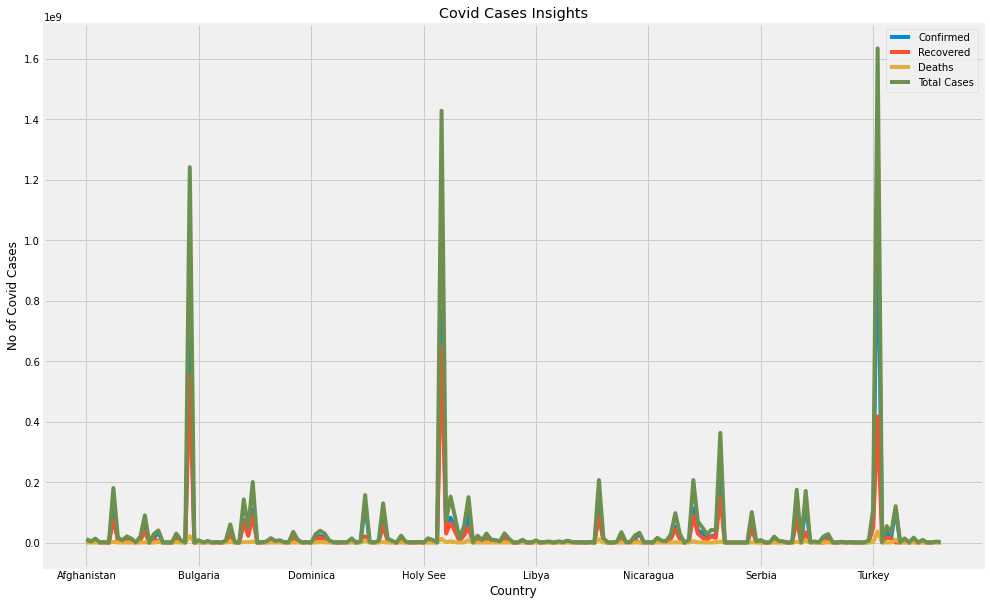

In [229]:
df1 = df.groupby(["Country"]).sum()
w1 = df1.plot(figsize=(15,10))
w1.set_xlabel("Country")
w1.set_ylabel("No of Covid Cases")
w1.title.set_text("Covid Cases Insights")
plt.show()

In [230]:
in_df = df[df["Country"]=="India"].groupby("Date").sum()
in_df.head()



,Confirmed,Recovered,Deaths,Total Cases
Date,,,,
2020-01-22,0,0,0,0
2020-01-23,0,0,0,0
2020-01-24,0,0,0,0
2020-01-25,0,0,0,0
2020-01-26,0,0,0,0


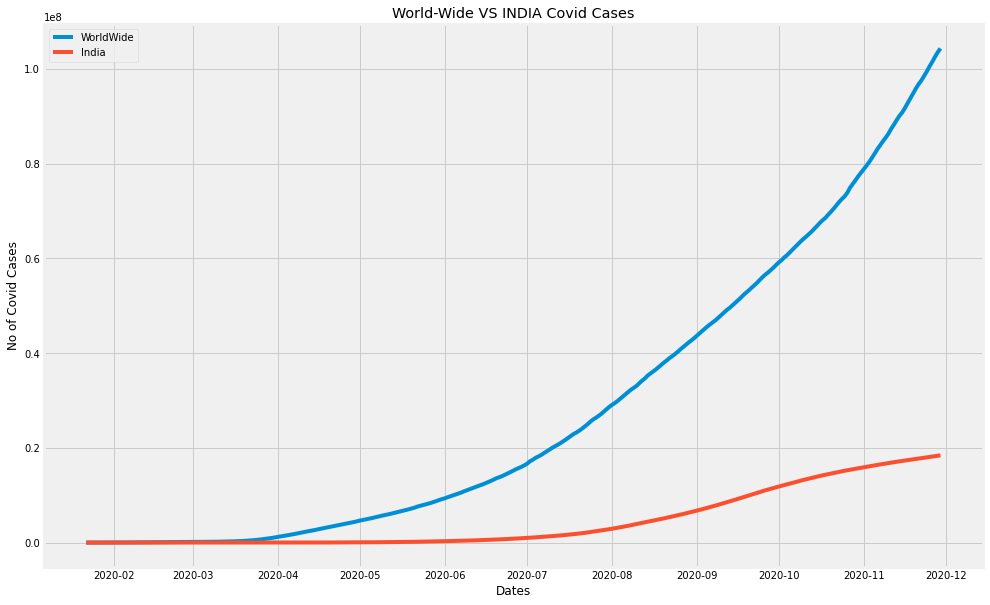

In [232]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111)

ax.plot(world_wide_df[["Total Cases"]], label="WorldWide")
ax.plot(in_df[["Total Cases"]], label="India")
ax.set_xlabel("Dates")
ax.set_ylabel("No of Covid Cases")
ax.title.set_text("World-Wide VS INDIA Covid Cases")

ax.legend(loc="upper left")
plt.show()

In [235]:
in_df["Daily Cases"] = in_df["Confirmed"].sub(in_df["Confirmed"].shift())
in_df["Daily Deaths"] = in_df["Deaths"].sub(in_df["Deaths"].shift())
in_df["Daily Recovered"] = in_df["Recovered"].sub(in_df["Recovered"].shift())
in_df = in_df.reset_index()
in_df.columns

Index(['Date', 'Confirmed', 'Recovered', 'Deaths', 'Total Cases',
       'Daily Cases', 'Daily Deaths', 'Daily Recovered'],
      dtype='object')

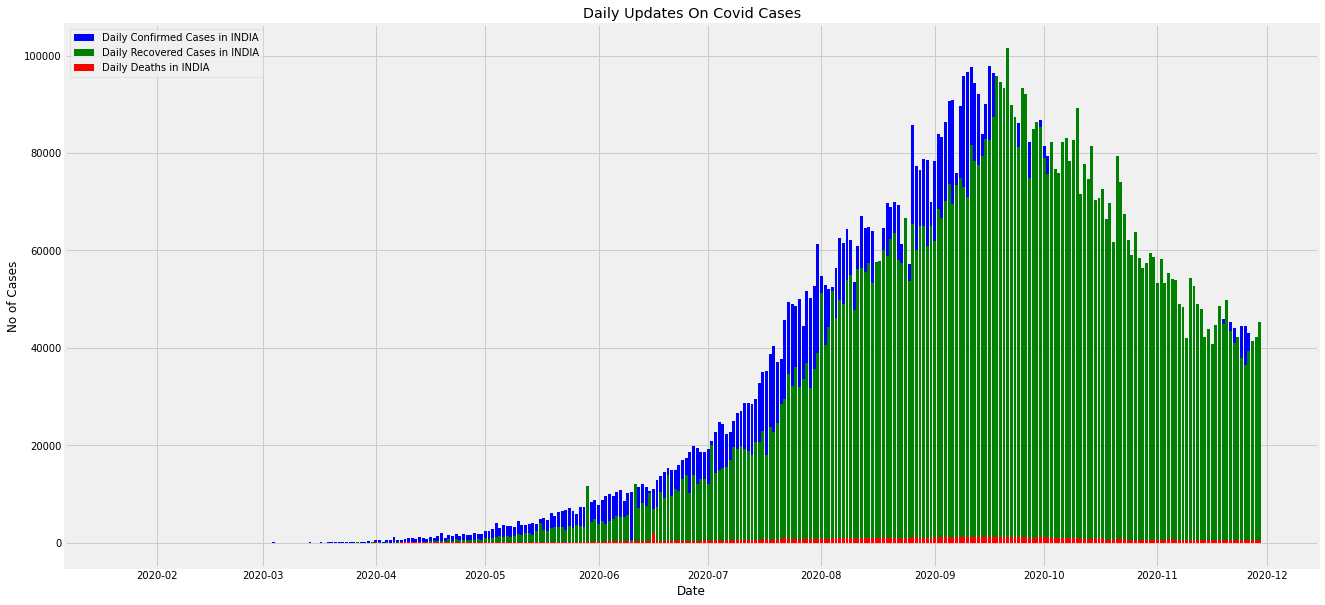

In [243]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)

ax.bar(in_df["Date"], in_df["Daily Cases"], color="blue", label="Daily Confirmed Cases in INDIA")
ax.bar(in_df["Date"], in_df["Daily Recovered"], color="green", label="Daily Recovered Cases in INDIA")
ax.bar(in_df["Date"], in_df["Daily Deaths"], color="red", label="Daily Deaths in INDIA")

ax.legend(loc="upper left")
ax.set_xlabel("Date")
ax.set_ylabel("No of Cases")
ax.title.set_text("Daily Updates On Covid Cases")
plt.show()

In [287]:
from datetime import date, timedelta
yestarday = date.today() - timedelta(1)
yestarday.strftime("%Y-%m-%d")
today_df = df[df["Date"] == str(yestarday)]
top_10 = today_df.sort_values(["Confirmed"], ascending=False)[:10]
top_10 = top_10.reset_index()
top_10.loc["Rest_of_the_world"] = today_df.sort_values(["Confirmed"], ascending=False)[10:].sum()
top_10.loc["Rest_of_the_world", "Country"] = "Rest of the World"
top_10

,index,Date,Country,Confirmed,Recovered,Deaths
0,55400.0,2020-11-29,US,13383320,5065030,266873
1,25039.0,2020-11-29,India,9431691,8847600,137139
2,7511.0,2020-11-29,Brazil,6314740,5581436,172833
3,19718.0,2020-11-29,France,2270573,167005,52410
4,44445.0,2020-11-29,Russia,2249890,1746279,39127
5,50392.0,2020-11-29,Spain,1628208,150376,44668
6,56652.0,2020-11-29,United Kingdom,1621305,3514,58342
7,26917.0,2020-11-29,Italy,1585178,734503,54904
8,2190.0,2020-11-29,Argentina,1418807,1249843,38473
9,11893.0,2020-11-29,Colombia,1308376,1204452,36584


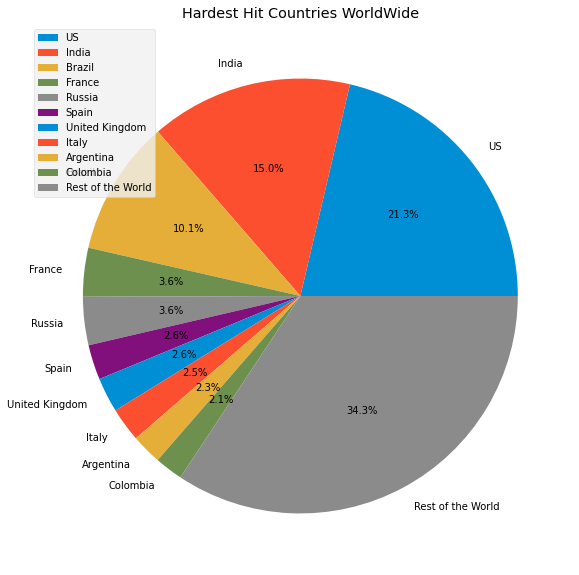

In [291]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111)

ax.pie(top_10["Confirmed"], labels=top_10["Country"], autopct="%1.1f%%")
ax.title.set_text("Hardest Hit Countries WorldWide")
ax.legend(loc="upper left")
plt.show()
